<a href="https://colab.research.google.com/github/Blackman9t/Advanced-Data-Science/blob/master/pyspark_fundamentals_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM intro to spark lab, part 1 and DataCamp intro to Pyspark, lesson 1

**Spark is a fast and general cluster computing system for Big Data. It provides
high-level APIs in Scala, Java, and Python, and an optimized engine that
supports general computation graphs for data analysis. It also supports a
rich set of higher-level tools including Spark SQL for SQL and structured
data processing, MLlib for machine learning, GraphX for graph processing,
and Spark Streaming for stream processing.**

**This is a very comprehensive notebook on pyspark. It contains tutorials from IBM and DataCamp combined.<br>
This notebook holds the IBM intro to spark tutorials parts 1 and 2 and the DataCamp intro to pyspark course lessons 1 and 2.<br> A continuation link is provided at the end of this notebook**

********************************************************************

### IBM Table of Contents

In the first four sections of this notebook, you'll learn about Spark with very simple examples. In the last two sections, you'll use what you learned to analyze data files that have more realistic data sets.

Work with the SparkContext<br>
1.1 Invoke the SparkContext<br>
1.2 Check the Spark version<br>
Work with RDDs<br>
2.1 Create a collection<br>
2.2 Create an RDD<br>
2.3 View the data<br>
2.4 Create another RDD<br>
Manipulate data in RDDs<br>
3.1 Update numeric values<br>
3.2 Add numbers in an array<br>
3.3 Split and count strings<br>
3.4 Counts words with a pair RDD<br>
Filter data<br>
Analyze text data from a file<br>
5.1 Get the data from a URL<br>
5.2 Create an RDD from the file<br>
5.3 Filter for a word<br>
5.4 Count instances of a string at the beginning of words<br>
5.5 Count instances of a string within words<br>
Analyze numeric data from a file<br>
Summary and next steps

********************************************************************************

Let's load our spark dependencies

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz

!pip install -q findspark
!pip install pyspark
# Set up required environment variables

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

Now let's initialise a spark context if none exists

In [2]:
from pyspark import SparkConf, SparkContext
try:
    conf = SparkConf().setMaster("local").setAppName("My App")
    sc = SparkContext(conf = conf)
    print('SparkContext Initialised Successfully!')
except Exception as e:
    print(e)

SparkContext Initialised Successfully!


In [3]:
sc

<SparkContext master=local appName=My App>

Next, let's create our Spark session wherein we will perform parallelized activities through the Spark context.

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('My App').getOrCreate()

In [5]:
spark

To acquire and extract the data, simply run the following Bash scripts: Dataset acquired from GroupLens. Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.

In [6]:
!wget -O moviedataset.zip https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
print('unziping ...')
!unzip -o -j moviedataset.zip 

--2020-02-01 12:54:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/moviedataset.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160301210 (153M) [application/zip]
Saving to: ‘moviedataset.zip’

moviedataset.zip    100%[===================>] 152.88M  29.9MB/s    in 4.9s    

2020-02-01 12:54:31 (30.9 MB/s) - ‘moviedataset.zip’ saved [160301210/160301210]

unziping ...
Archive:  moviedataset.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: README.txt              
  inflating: tags.csv                


In [0]:
ratings_data = 'ratings.csv'

In [8]:
import pandas as pd
ratings_df = pd.read_csv(ratings_data)
ratings_df.shape

(22884377, 4)

In [9]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


To save the ratings dataframe as a csv file

In [0]:
# rating_csv = ratings_df.to_csv() 

The SparkSession class has a method to save a Pandas DataFrame as a Spark DataFrame.

The .createDataFrame() method takes a pandas DataFrame and returns a Spark DataFrame.

The output of this method is stored locally, not in the SparkSession catalog. This means that you can use all the Spark DataFrame methods on it, but you can't access the data in other contexts.

For example, a SQL query (using the .sql() method) that references your DataFrame will throw an error. To access the data in this way, you have to save it as a temporary table.

You can do this using the .createTempView() Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the catalog, but as this table is temporary, it can only be accessed from the specific SparkSession used to create the Spark DataFrame.

There is also the method .createOrReplaceTempView(). This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. You'll use this method to avoid running into problems with duplicate tables.

In [11]:
spark.catalog.listTables()

[]

In [12]:
movies_df = pd.read_csv('movies.csv')
print('movies_df shape is {}'.format(movies_df.shape))
movies_df.head()

movies_df shape is (34208, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
# Let's make movies_df a Spark DataFrame

spark_movies_df = spark.createDataFrame(movies_df)
spark_movies_df.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

Let's print the schema of the above spark DataFrame 

In [14]:
print(spark_movies_df.printSchema())

root
 |-- movieId: long (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)

None


### cardinality in Databases

In the context of databases, cardinality refers to the uniqueness of data values contained in a column. High cardinality means that the column contains a large percentage of totally unique values. Low cardinality means that the column contains a lot of “repeats” in its data range.

Now let's add the spark dataframe we just created from the movies_df as a temporary file with name 'temp_movies', to our spark session catalog.
<br>We use the .createOrReplace() method to avoid duplicates, just incase a table of same name exists.<br>
If such a table exists then the .replaceOrCreate() method will update the table and not duplicate it.

In [0]:
spark_movies_df.createOrReplaceTempView("temp_movies")

Let's print out the tables in our catalog again to see if the temp_movies is included

In [16]:
print(spark.catalog.listTables())

[Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


We can clearly see the temp_movies table we added. 
<br>Know that this table will only be available in this spark session as a temporary table

### Dropping the middle man
Now you know how to put data into Spark via pandas, but you're probably wondering why deal with pandas at all? Wouldn't it be easier to just read a text file straight into Spark? Of course it would!

Luckily, your SparkSession has a .read attribute which has several methods for reading different data sources into Spark DataFrames. Using these you can create a DataFrame from a .csv file just like with regular pandas DataFrames!

Use the .read.csv() method to create a Spark DataFrame called spark_links for the links.csv file above.
<br>Pass the argument header=True so that Spark knows to take the column names from the first line of the file.

In [0]:
spark_links_df = spark.read.csv('links.csv', header=True)

In [18]:
# let's see the first 20 rows of the spark_links_df 
spark_links_df.show()

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|      1|0114709|   862|
|      2|0113497|  8844|
|      3|0113228| 15602|
|      4|0114885| 31357|
|      5|0113041| 11862|
|      6|0113277|   949|
|      7|0114319| 11860|
|      8|0112302| 45325|
|      9|0114576|  9091|
|     10|0113189|   710|
|     11|0112346|  9087|
|     12|0112896| 12110|
|     13|0112453| 21032|
|     14|0113987| 10858|
|     15|0112760|  1408|
|     16|0112641|   524|
|     17|0114388|  4584|
|     18|0113101|     5|
|     19|0112281|  9273|
|     20|0113845| 11517|
+-------+-------+------+
only showing top 20 rows



## 1. Work with the SparkContext object
The Spark driver application uses the SparkContext object to allow a programming interface to interact with the driver application. The SparkContext object tells Spark how and where to access a cluster.

The Watson Studio notebook environment predefines the Spark context for you.

In other environments, you need to pick an interpreter (for example, pyspark for Python) and create a SparkConf object to initialize a SparkContext object. For example:<br>
```
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName(appName).setMaster(master)
sc = SparkContext(conf=conf)
```

### 1.1 Invoke the SparkContext
Run the following cell to invoke the SparkContext:

In [19]:
sc

<SparkContext master=local appName=My App>

Let's check if there is an existing spark session that we can use.<br>Otherwise we use the .getOrCreate() method to make one

In [0]:
from pyspark.sql import SparkSession

In [21]:
# Create my_spark session either from existion or a new one
try:
    my_spark = SparkSession.builder.getOrCreate()
    print('spark session created successfully!')
except Exception as e:
    print(e)

spark session created successfully!


In [22]:
# Print my_spark
print(my_spark)

my_spark SparkSession also accesses the current session database as expected. In addition to spark session pre-defined for us by IBM.

### Viewing tables
Once you've created a SparkSession, you can start poking around to see what data is in your cluster!

Your SparkSession has an attribute called catalog which lists all the data inside the cluster. This attribute has a few methods for extracting different pieces of information.

One of the most useful is the .listTables() method, which returns the names of all the tables in your cluster as a list.

In [23]:
# See what tables are in your cluster by calling spark.catalog.listTables() and printing the result!
try:
    print(spark.catalog.listTables())
except Exception as e:
    print(type(e),e)  

[Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


### 1.2 Check the Spark version
Check the version of the Spark driver application:

In [24]:
sc.version

'2.4.4'

## 2. Work with Resilient Distributed Datasets
Spark uses an abstraction for working with data called a Resilient Distributed Dataset (RDD). An RDD is a collection of elements that can be operated on in parallel. RDDs are immutable, so you can't update the data in them. To update data in an RDD, you must create a new RDD. In Spark, all work is done by creating new RDDs, transforming existing RDDs, or using RDDs to compute results. When working with RDDs, the Spark driver application automatically distributes the work across the cluster.

You can construct RDDs by parallelizing existing Python collections (lists), by manipulating RDDs, or by manipulating files in HDFS or any other storage system.

You can run these types of methods on RDDs:

Actions: query the data and return values
Transformations: manipulate data values and return pointers to new RDDs.

### 2.1 Create a collection
Create a Python collection of the numbers 1 - 10:

In [25]:
x = list(range(1, 11))
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### 2.2 Create an RDD
Put the collection into an RDD named x_nbr_rdd using the parallelize method:

In [0]:
x_nbr_rdd = sc.parallelize(x)

### 2.3 View the data
View the first element in the RDD:

In [27]:
x_nbr_rdd.first()

1

In [28]:
# Let's view the first five items
x_nbr_rdd.take(5)

[1, 2, 3, 4, 5]

### 2.4 Create another RDD
Create a Python collection that contains strings:

In [0]:
y = ["Hello Human", "My name is Spark"]

Put the collection into an RDD:

In [0]:
y_str_rdd = sc.parallelize(y)

View the first element in the RDD:

In [31]:
y_str_rdd.first()

'Hello Human'

You created the string "Hello Human" and you returned it as the first element of the RDD. To analyze a set of words, you can map each word into an RDD element.

## 3. Manipulate data in RDDs

### 3. Manipulate data in RDDs
Remember that to manipulate data, you use transformation functions.<br>

Here are some common Python transformation functions that you'll be using in this notebook:<br>

map(func): returns a new RDD with the results of running the specified function on each element<br>
filter(func): returns a new RDD with the elements for which the specified function returns true<br>
distinct([numTasks])): returns a new RDD that contains the distinct elements of the source RDD<br>
flatMap(func): returns a new RDD by first running the specified function on all elements, returning 0 or more results for each original element, and then flattening the results into individual elements<br>
You can also create functions that run a single expression and don't have a name with the Python lambda keyword. <br>For example, this function returns the sum of its arguments: lambda a , b : a + b.

### 3.1 Update numeric values
Run the map() function with the lambda keyword to replace each element, X, in your first RDD (the one that has numeric values) with X+1. Because RDDs are immutable, you need to specify a new RDD name.

In [0]:
x_nbr_rdd2 = x_nbr_rdd.map(lambda x: x + 1)

Now look at the elements of the new RDD:

In [33]:
x_nbr_rdd2.collect()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Be careful with the collect method! It returns all elements of the RDD to the driver. Returning a large data set might not be very useful. <br>No-one wants to scroll through a million rows!... Use rdd.take(n) instead.

In [34]:
# To find the len or number of elements in a collection
len(x_nbr_rdd2.collect())

10

### 3.2 Add numbers in an array
An array of values is a common data format where multiple values are contained in one element. You can manipulate the individual values if you split them up into separate elements.

Create an array of numbers by including quotation marks around the whole set of numbers. If you omit the quotation marks, you get a collection of numbers instead of an array.

In [0]:
X = ['1, 2, 3, 4, 5, 6, 7, 8, 9, 10']

Create an RDD for the array:

In [0]:
y_rd = sc.parallelize(X)

In [37]:
y_rd.take(1)

['1, 2, 3, 4, 5, 6, 7, 8, 9, 10']

Split the values at commas and add values in the positions 2 and 9 in the array. <br>Keep in mind that an array starts with position 0. Use a backslash character, , to break the line of code for clarity.

In [0]:
sum_rd = y_rd.map(lambda y: y.split(',')).\
                 map(lambda y: int(y[2]) + int(y[9]))

In [39]:
sum_rd.first()

13

### 3.3 Split and count text strings
Create an RDD with a text string and show the first element:

In [0]:
Words = ["Hello Human. I'm Spark and I love running analysis on data."]

In [41]:
words_rd = sc.parallelize(Words)
words_rd.first()

"Hello Human. I'm Spark and I love running analysis on data."

Split the string into separate lines at the space characters and look at the first element:

In [0]:
Words_rd2 = words_rd.map(lambda x: x.split(' '))

In [43]:
Words_rd2.first()

['Hello',
 'Human.',
 "I'm",
 'Spark',
 'and',
 'I',
 'love',
 'running',
 'analysis',
 'on',
 'data.']

Count the number of elements in this RDD with the count() method:

In [44]:
Words_rd2.count()

1

Of course, you already knew that there was only one element because you ran the first() method and it returned the whole string. <br>Splitting the string into multiple lines did not create multiple elements.

Now split the string again, but this time with the flatmap() method, and look at the first three elements:

### Splitting string with flatmap() method

In [0]:
Words_rd2 = words_rd.flatMap(lambda line: line.split(" "))

In [46]:
# Let's see the first three elements now
Words_rd2.take(3)

['Hello', 'Human.', "I'm"]

This time each word is separated into its own element.

### 3.4 Count words with a pair RDD
A common way to count the number of instances of words in an RDD is to create a pair RDD. <br>A pair RDD converts each word into a key-value pair: the word is the key and the number 1 is the value. <br>Because the values are all 1, when you add the values for a particular word, you get the number of instances of that word.

Create an RDD:

In [47]:
z = ["First,Line", "Second,Line", "and,Third,Line"]
z_str_rdd = sc.parallelize(z)
z_str_rdd.first()

'First,Line'

Split the elements into individual words with the flatmap() method:

In [48]:
z_str_rdd_split_flatmap = z_str_rdd.flatMap(lambda x: x.split(','))
z_str_rdd_split_flatmap.first()

'First'

In [49]:
# Let's see all the words
z_str_rdd_split_flatmap.collect()

['First', 'Line', 'Second', 'Line', 'and', 'Third', 'Line']

Convert the elements into key-value pairs:

In [50]:
countWords = z_str_rdd_split_flatmap.map(lambda x: (x, 1))
countWords.take(3)

[('First', 1), ('Line', 1), ('Second', 1)]

Now sum all the values by key to find the number of instances for each word:

In [51]:
from operator import add
countwords2 = countWords.reduceByKey(add)
countwords2.collect()

[('First', 1), ('Line', 3), ('Second', 1), ('and', 1), ('Third', 1)]

### 4. Filter data
The filter command creates a new RDD from another RDD based on a filter criteria. The filter syntax is:

.filter(lambda line: "Filter Criteria Value" in line)

Hint: Use a simple python print command to add a string to your Spark results and to run multiple actions in single cell.

Find the number of instances of the word Line in the z_str_rdd_split_flatmap RDD:

In [52]:
words_rd3 = z_str_rdd_split_flatmap.filter(lambda x: 'Line' in x)
print("The count of word " + str(words_rd3.first()))
print("is " + str(words_rd3.count()))

The count of word Line
is 3


### 5. Analyze text data from a file
In this section, you'll download a file from a URL, create an RDD from it, and analyze the text in it.

You can run shell commands by prefacing them with an exclamation point (!).
<br>Remove any files with the same name as the file that you're going to download and then load a file named README.md from a URL into the filesystem for Spark:

In [53]:
!rm README.md* -f
!wget https://raw.githubusercontent.com/carloapp2/SparkPOT/master/README.md

--2020-02-01 12:54:57--  https://raw.githubusercontent.com/carloapp2/SparkPOT/master/README.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3624 (3.5K) [text/plain]
Saving to: ‘README.md’

README.md           100%[===================>]   3.54K  --.-KB/s    in 0s      

2020-02-01 12:54:57 (99.8 MB/s) - ‘README.md’ saved [3624/3624]



5.2 Create an RDD from the file
Use the textFile method to create an RDD named textfile_rdd based on the README.md file. <br>The RDD will contain one element for each line in the README.md file. Also, count the number of lines in the RDD, which is the same as the number of lines in the text file.

In [54]:
# Now let's read the READme.md text file to an RDD
textfile_rdd = sc.textFile('README.md')
# Now lets see the number of lines in the file
textfile_rdd.count()

98

In [55]:
# let's see the first 5 lines
textfile_rdd.take(5)

['# Apache Spark',
 '',
 'Spark is a fast and general cluster computing system for Big Data. It provides',
 'high-level APIs in Scala, Java, and Python, and an optimized engine that',
 'supports general computation graphs for data analysis. It also supports a']

### 5.3 Filter for a word
Filter the RDD to keep only the elements that contain the word "Spark" with the filter transformation:

In [56]:
spark_lines = textfile_rdd.filter(lambda x: "Spark" in x)
# Let's see the first 10 lines from our filter
spark_lines.take(10)

['# Apache Spark',
 'Spark is a fast and general cluster computing system for Big Data. It provides',
 'rich set of higher-level tools including Spark SQL for SQL and structured',
 'and Spark Streaming for stream processing.',
 'You can find the latest Spark documentation, including a programming',
 '## Building Spark',
 'Spark is built using [Apache Maven](http://maven.apache.org/).',
 'To build Spark and its example programs, run:',
 '["Building Spark"](http://spark.apache.org/docs/latest/building-spark.html).',
 'The easiest way to start using Spark is through the Scala shell:']

In [57]:
# Let's also see howmany lines in total have "Spark" in them
spark_lines.count()

19

### 5.4 Count the instances of a string at the beginning of words
Count the number of times the substring "Spark" appears at the beginning of a word in the original text.

Here's what you need to do:

Run a flatMap transformation on the Spark_lines RDD and split on white spaces.<br>
Create an RDD with key-value pairs where the first element of the tuple is the word and the second element is the number 1.<br>
Run a reduceByKey method with the add function to count the number of instances of each word.<br>
Filter the resulting RDD to keep only the elements that start with the word "Spark". <br>In Python, the syntax to determine whether a string starts with a token is: string.startswith("token")<br>
Display the resulting list of elements that start with "Spark".

In [58]:
# Let's get to it.
temp = textfile_rdd.flatMap(lambda x: x.split(" ")).map(lambda x: (x,1)).reduceByKey(add)
temp.take(10)

[('#', 1),
 ('Apache', 1),
 ('Spark', 14),
 ('', 75),
 ('is', 6),
 ('a', 9),
 ('fast', 1),
 ('and', 10),
 ('general', 2),
 ('cluster', 2)]

In [59]:
# Now let's filter by Spark
temp.filter(lambda x: x[0].startswith("Spark")).collect()

[('Spark', 14),
 ('Spark"](http://spark.apache.org/docs/latest/building-spark.html).', 1),
 ('SparkPi', 2),
 ('Spark](#building-spark).', 1),
 ('Spark.', 1)]

### 5.5 Count instances of a string within words
Now filter and display the elements that contain the substring "Spark" anywhere in the word, instead of just at the beginning of words like the last section. <br>Your result should be a superset of the previous result.

The Python syntax to determine whether a string contains a particular token is: "token" in string

In [60]:
temp.filter(lambda x: "Spark" in x[0]).collect()

[('Spark', 14),
 ('Spark"](http://spark.apache.org/docs/latest/building-spark.html).', 1),
 ('SparkPi', 2),
 ('Spark](#building-spark).', 1),
 ('tests](https://cwiki.apache.org/confluence/display/SPARK/Contributing+to+Spark#ContributingtoSpark-AutomatedTesting).',
  1),
 ('Spark.', 1)]

### 6. Analyze numeric data from a file
You'll analyze a sample file that contains instructor names and scores. <br>The file has the following format: Instructor Name,Score1,Score2,Score3,Score4. Here is an example line from the text file: "Carlo,5,3,3,4"

Add all scores and report on results:

Download the file.<br>
Load the text file into an RDD.<br>
Run a transformation to create an RDD with the instructor names and the sum of the 4 scores per instructor.<br>
Run a second transformation to compute the average score for each instructor.<br>
Display the first 5 results.

In [61]:
# downloading the file
!rm Scores.txt* -f
!wget https://raw.githubusercontent.com/carloapp2/SparkPOT/master/Scores.txt

--2020-02-01 12:55:02--  https://raw.githubusercontent.com/carloapp2/SparkPOT/master/Scores.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75 [text/plain]
Saving to: ‘Scores.txt’

Scores.txt          100%[===================>]      75  --.-KB/s    in 0s      

2020-02-01 12:55:02 (14.3 MB/s) - ‘Scores.txt’ saved [75/75]



In [62]:
raw_rdd = sc.textFile('Scores.txt')
# Let's see first 5 elements
raw_rdd.take(5)

['Carlo,5,3,3,4',
 'Mokhtar,2,5,5,3',
 'Jacques,4,2,4,5',
 'Braden,5,3,2,5',
 'Chris,5,4,5,1']

In [63]:
sum_scores = raw_rdd.map(lambda x: x.split(",")).map(lambda y: (y[0], int(y[1])+int(y[2])+int(y[3])+int(y[4])))
sum_scores.take(5)

[('Carlo', 15),
 ('Mokhtar', 15),
 ('Jacques', 15),
 ('Braden', 15),
 ('Chris', 15)]

In [0]:
final = sum_scores.map(lambda y: (y[0], y[1], y[1]/4.0))

In [65]:
final.take(5)

[('Carlo', 15, 3.75),
 ('Mokhtar', 15, 3.75),
 ('Jacques', 15, 3.75),
 ('Braden', 15, 3.75),
 ('Chris', 15, 3.75)]

# IBM intro to spark lab, part 2 and DataCamp intro to Pyspark, lesson 2

********************************************************************************

## DataCamp Lesson 2:

Creating Columns

Let's look at performing column-wise operations. 
<br>In Spark you can do this using the .withColumn() method, which takes two arguments. First, a string with the name of your new column, and second the new column itself.
<br>The new column must be an object of class Column. Creating one of these is as easy as extracting a column from your DataFrame using df.colName.

Updating a Spark DataFrame is somewhat different than working in pandas because the Spark DataFrame is immutable. <br>This means that it can't be changed, and so columns can't be updated in place.

In [66]:
# let's create a new spark dataframe from the tags.csv file
spark_tags_df = spark.read.csv('tags.csv', header=True)
spark_tags_df.show()

+------+-------+--------------------+----------+
|userId|movieId|                 tag| timestamp|
+------+-------+--------------------+----------+
|    19|   2324|         bittersweet|1428651158|
|    19|   2324|           holocaust|1428651112|
|    19|   2324|        World War II|1428651118|
|    23|   7075|           hilarious|1378675786|
|    23|   7075|          Underrated|1378675786|
|    54|    357|              Garath|1354417040|
|    57|    260|     Science Fiction|1433167996|
|   120| 109374|      cinematography|1445114894|
|   157|   7142|          bad script|1362371627|
|   157|   7142|             no plot|1362371612|
|   157|  52975|           feel good|1362371683|
|   157|  52975|         great music|1362371698|
|   157|  52975|             musical|1362371718|
|   157|  55267|        large family|1362371415|
|   157|  55267|           realistic|1362371439|
|   157|  55267|            romantic|1362371491|
|   157|  55267|        Steve Carell|1362371472|
|   157|  55267|    

In [0]:
# Let's add this table to our spark session catalog
spark_tags_df.createOrReplaceTempView("spark_tags_df")

In [68]:
print('spark_tags_df has {} rows and {} columns.'.format(spark_tags_df.count(), len(spark_tags_df.columns)))

spark_tags_df has 586994 rows and 4 columns.


In [69]:
# Now let's see the tables in our spark session catalog
spark.catalog.listTables()

[Table(name='spark_tags_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

### Creating a new copy of an existing spark table

In [70]:
# We use the spark.table() function to create a new table from an existing one
# This function takes the name of the existing table as a string
new_spark_tags_df = spark.table("spark_tags_df")
new_spark_tags_df.show(10)

+------+-------+---------------+----------+
|userId|movieId|            tag| timestamp|
+------+-------+---------------+----------+
|    19|   2324|    bittersweet|1428651158|
|    19|   2324|      holocaust|1428651112|
|    19|   2324|   World War II|1428651118|
|    23|   7075|      hilarious|1378675786|
|    23|   7075|     Underrated|1378675786|
|    54|    357|         Garath|1354417040|
|    57|    260|Science Fiction|1433167996|
|   120| 109374| cinematography|1445114894|
|   157|   7142|     bad script|1362371627|
|   157|   7142|        no plot|1362371612|
+------+-------+---------------+----------+
only showing top 10 rows



Now, let's add an extra column to new_spark_tags_df by just adding 1 to the userId values.<br>
As usual, this means we are basically creating a new data frame, since data frames are immutable in spark.

In [71]:
new_spark_tags_df = new_spark_tags_df.withColumn('extra', new_spark_tags_df.userId+1)
new_spark_tags_df.show(5)

+------+-------+------------+----------+-----+
|userId|movieId|         tag| timestamp|extra|
+------+-------+------------+----------+-----+
|    19|   2324| bittersweet|1428651158| 20.0|
|    19|   2324|   holocaust|1428651112| 20.0|
|    19|   2324|World War II|1428651118| 20.0|
|    23|   7075|   hilarious|1378675786| 24.0|
|    23|   7075|  Underrated|1378675786| 24.0|
+------+-------+------------+----------+-----+
only showing top 5 rows



In [0]:
# Let's add the spark_links_df to our catalog. 
# This is the spark movie links data frame
spark_links_df.createOrReplaceTempView('spark_links_df')

In [73]:
spark.catalog.listTables()

[Table(name='spark_links_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_tags_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [74]:
spark_links_df.show(5)

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|      1|0114709|   862|
|      2|0113497|  8844|
|      3|0113228| 15602|
|      4|0114885| 31357|
|      5|0113041| 11862|
+-------+-------+------+
only showing top 5 rows



In [75]:
spark_links_df.count()

34208

### Filtering Data

Let's take a look at the .filter() method. As you might suspect, this is the Spark counterpart of SQL's WHERE clause. The .filter() method takes either an expression that would follow the WHERE clause of a SQL expression as a string, or a Spark Column of boolean (True/False) values.

For example, the following two expressions will produce the same output:
```
flights.filter("air_time > 120").show()
flights.filter(flights.air_time > 120).show()
```

Notice that in the first case, we pass a string to .filter(). In SQL, we would write this filtering task as SELECT * FROM flights WHERE air_time > 120. Spark's .filter() can accept any expression that could go in the WHEREclause of a SQL query (in this case, "air_time > 120"), as long as it is passed as a string. Notice that in this case, we do not reference the name of the table in the string -- as we wouldn't in the SQL request.

In the second case, we actually pass a column of boolean values to .filter(). Remember that flights.air_time > 120 returns a column of boolean values that has True in place of those records in flights.air_time that are over 120, and False otherwise.

In [76]:
# First let's filter the data by passing a string
movie_id_over_30k = spark_links_df.filter("movieId > 30000")
movie_id_over_30k.show(10)

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|  30659|0383534| 41171|
|  30695|0316824| 23592|
|  30698|0376568| 47614|
|  30701|0059012|   986|
|  30707|0405159|    70|
|  30712|0044954| 31713|
|  30721|0056062| 32041|
|  30723|0100873| 55309|
|  30742|0052218| 38724|
|  30745|0361668| 12487|
+-------+-------+------+
only showing top 10 rows



In [77]:
# Next let's filter by using a boolean expression
movie_id_over_30k2 = spark_links_df.filter(spark_links_df.movieId > 30000)
movie_id_over_30k2.show(10)

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|  30659|0383534| 41171|
|  30695|0316824| 23592|
|  30698|0376568| 47614|
|  30701|0059012|   986|
|  30707|0405159|    70|
|  30712|0044954| 31713|
|  30721|0056062| 32041|
|  30723|0100873| 55309|
|  30742|0052218| 38724|
|  30745|0361668| 12487|
+-------+-------+------+
only showing top 10 rows



In [78]:
movie_id_over_30k.count()

24638

In [79]:
movie_id_over_30k2.count()

24638

In [80]:
# Let's compare them to be sure
movie_id_over_30k.count() == movie_id_over_30k2.count()

True

### Selecting
The Spark variant of SQL's SELECT is the .select() method. This method takes multiple arguments - one for each column you want to select. These arguments can either be the column name as a string (one for each column) or a column object (using the df.colName syntax). When you pass a column object, you can perform operations like addition or subtraction on the column to change the data contained in it, much like inside .withColumn().

The difference between .select() and .withColumn() methods is that .select() returns only the columns you specify, while .withColumn() returns all the columns of the DataFrame in addition to the one you defined. It's often a good idea to drop columns you don't need at the beginning of an operation so that you're not dragging around extra data as you're wrangling. In this case, you would use .select() and not .withColumn().

In [0]:
# Let's create a dataframe from the ratings csv file.
spark_ratings_df = spark.read.csv('ratings.csv', header=True)

# Let's add it to the session catalog
spark_ratings_df.createOrReplaceTempView('spark_ratings_df')

In [82]:
# Finally let's see the shape and first 20 rows
print("shape of spark_ratings_df is {} rows, and {} cols.".format(spark_ratings_df.count(), len(spark_ratings_df.columns)))
spark_ratings_df.show()

shape of spark_ratings_df is 22884377 rows, and 4 cols.
+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    169|   2.5|1204927694|
|     1|   2471|   3.0|1204927438|
|     1|  48516|   5.0|1204927435|
|     2|   2571|   3.5|1436165433|
|     2| 109487|   4.0|1436165496|
|     2| 112552|   5.0|1436165496|
|     2| 112556|   4.0|1436165499|
|     3|    356|   4.0| 920587155|
|     3|   2394|   4.0| 920586920|
|     3|   2431|   5.0| 920586945|
|     3|   2445|   4.0| 920586945|
|     4|     16|   4.0|1037740142|
|     4|     39|   4.0|1037740562|
|     4|     45|   4.0|1037808019|
|     4|     47|   2.0|1037739998|
|     4|     94|   5.0|1037740486|
|     4|    101|   4.0|1037737327|
|     4|    246|   4.0|1037739164|
|     4|    288|   2.0|1037737415|
|     4|    296|   4.0|1037741922|
+------+-------+------+----------+
only showing top 20 rows



In [83]:
# Select columns movieId and rating from spark_ratings_df by passing their string names. save same as movies1
movies1 = spark_ratings_df.select("movieId", "rating")
movies1.show(5)

+-------+------+
|movieId|rating|
+-------+------+
|    169|   2.5|
|   2471|   3.0|
|  48516|   5.0|
|   2571|   3.5|
| 109487|   4.0|
+-------+------+
only showing top 5 rows



In [84]:
# Select columns userId and movieId from movies_df by using the column object syntanx. save same as movies2
movies2 = spark_ratings_df.select(spark_ratings_df.userId, spark_ratings_df.movieId)
movies2.show(5)

+------+-------+
|userId|movieId|
+------+-------+
|     1|    169|
|     1|   2471|
|     1|  48516|
|     2|   2571|
|     2| 109487|
+------+-------+
only showing top 5 rows



In [0]:
# let's define and employ two filters for movies1 and 2
filterA = movies2.movieId >= 100000
filterB = movies1.rating == 4.0

In [0]:
filterA_data = movies2.filter(filterA)
filterB_data = movies1.filter(filterB)

In [87]:
filterA_data.show(5)

+------+-------+
|userId|movieId|
+------+-------+
|     2| 109487|
|     2| 112552|
|     2| 112556|
|     5| 112183|
|     5| 112552|
+------+-------+
only showing top 5 rows



In [88]:
filterB_data.show(5)

+-------+------+
|movieId|rating|
+-------+------+
| 109487|   4.0|
| 112556|   4.0|
|    356|   4.0|
|   2394|   4.0|
|   2445|   4.0|
+-------+------+
only showing top 5 rows



### Selecting II
Similar to SQL, you can also use the .select() method to perform column-wise operations. When you're selecting a column using the df.colName notation, you can perform any column operation and the .select() method will return the transformed column. For example,
```
movies1.select(movies1.rating/5.0)
```
returns a column of ratings divided by 5. You can also use the .alias() method to rename a column you're selecting. <br>
So if you wanted to .select() the column norm_weight (which isn't in your DataFrame) you could do
```
movies1.select((movies1.rating/5.0).alias("norm_weight"))
```
The equivalent Spark DataFrame method .selectExpr() takes SQL expressions as a string:
```
movies1.selectExpr("rating/5.0 as norm_weight")
```
with the SQL as keyword being equivalent to the .alias() method. To select multiple columns, you can pass multiple strings.

In [89]:
# First let's create a copy of the spark_ratings_df table
new_spark_ratings_df = spark.table("spark_ratings_df")
new_spark_ratings_df.show(5)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    169|   2.5|1204927694|
|     1|   2471|   3.0|1204927438|
|     1|  48516|   5.0|1204927435|
|     2|   2571|   3.5|1436165433|
|     2| 109487|   4.0|1436165496|
+------+-------+------+----------+
only showing top 5 rows



In [90]:
norm_weight = new_spark_ratings_df.selectExpr("rating / 5.0 as norm_weight")
norm_weight.show(5)

+-----------+
|norm_weight|
+-----------+
|        0.5|
|        0.6|
|        1.0|
|        0.7|
|        0.8|
+-----------+
only showing top 5 rows



In [91]:
# Let's see the new_spark_ratings_df again if norm_weight col is added
new_spark_ratings_df.show()

# It's not added as .select() does not alterate the data frame like .withcolumn()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    169|   2.5|1204927694|
|     1|   2471|   3.0|1204927438|
|     1|  48516|   5.0|1204927435|
|     2|   2571|   3.5|1436165433|
|     2| 109487|   4.0|1436165496|
|     2| 112552|   5.0|1436165496|
|     2| 112556|   4.0|1436165499|
|     3|    356|   4.0| 920587155|
|     3|   2394|   4.0| 920586920|
|     3|   2431|   5.0| 920586945|
|     3|   2445|   4.0| 920586945|
|     4|     16|   4.0|1037740142|
|     4|     39|   4.0|1037740562|
|     4|     45|   4.0|1037808019|
|     4|     47|   2.0|1037739998|
|     4|     94|   5.0|1037740486|
|     4|    101|   4.0|1037737327|
|     4|    246|   4.0|1037739164|
|     4|    288|   2.0|1037737415|
|     4|    296|   4.0|1037741922|
+------+-------+------+----------+
only showing top 20 rows



## IBM watson spark lab, part 2

This notebook guides you through querying data with Spark, including how to create and use DataFrames, run SQL queries, apply functions to the results of SQL queries, join data from different data sources, and visualize data in graphs.

This notebook uses pySpark, the Python API for Spark. Some knowledge of Python is recommended. This notebook runs on Python 3.6 with Spark.

### 1. Prepare the environment and the data
Before you can run SQL queries on data in a Spark environment, you need to enable SQL processing and then move the data to the structured format of a DataFrame.

**1.1 Enable SQL processing**

The preferred method to enable SQL processing with Spark 2.0 is to use the new SparkSession object, but you can also create a SQLContext object.

Use the predefined Spark Context, sc, which contains the connection information for Spark, to create an SQLContext:
The preferred method to enable SQL processing with Spark 2.0 is to use the new SparkSession object, but you can also create a SQLContext object.

Use the predefined Spark Context, sc, which contains the connection information for Spark, to create an SQLContext:

In [0]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

**1.2 Download the data file**<br>
You'll download a JSON file with data about world banks from GitHub. The data is adapted from this data set: http://data.worldbank.org/data-catalog/projects-portfolio.

Remove any files with the same name as the file that you're going to download and then download the file from a URL:

In [93]:
!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2020-02-01 12:55:24--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: ‘world_bank.json.gz’

world_bank.json.gz  100%[===================>] 435.83K  --.-KB/s    in 0.04s   

2020-02-01 12:55:24 (11.9 MB/s) - ‘world_bank.json.gz’ saved [446287/446287]



**1.3 Create a DataFrame**<br>
Instead of creating an RDD to read the file, you'll create a Spark DataFrame. Unlike an RDD, a DataFrame creates a schema around the data, which supplies the necessary structure for SQL queries. A self-describing format like JSON is ideal for DataFrames, but many other file types are supported, including text (CSV) and Parquet.

Create a DataFrame:

In [0]:
example1_df = sqlContext.read.json("world_bank.json.gz")

In [95]:
# show the first five rows
example1_df.show(5)

+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+------------------+--------------------+------------------------+--------+-----------+-------+----------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+-----------+--------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+------+------+--------------------+--------------------+--------------------+-----------+---------+------------+--------------------+
|                 _id|approvalfy|board_approval_month|   boardapprovaldate|            borrower|         clos

In [96]:
# Print the schema to see how Spark SQL inferred the shape of the data:
print(example1_df.printSchema())

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

Now look at the first two rows of data.
<br>You can run the simple command print example1_df.take(2), however, for readability, run the following command to include a row of asterisks in between the data rows:

In [97]:
for row in example1_df.take(2):
    print(row)
    print("*" * 20)
    

Row(_id=Row($oid='52b213b38594d8a2be17c780'), approvalfy='1999', board_approval_month='November', boardapprovaldate='2013-11-12T00:00:00Z', borrower='FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate='2018-07-07T00:00:00Z', country_namecode='Federal Democratic Republic of Ethiopia!$!ET', countrycode='ET', countryname='Federal Democratic Republic of Ethiopia', countryshortname='Ethiopia', docty='Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode='C', grantamt=0, ibrdcommamt=0, id='P129828', idacommamt=130000000, impagency='MINISTRY OF EDUCATION', lendinginstr='Investment Project Financing', lendinginstrtype='IN', lendprojectcost=550000000, majorsector_percent=[Row(Name='Education', Percent=46), Row(Name='Education', Percent=26), Row(Name='Public Administration, Law, and Justice', Percent=16), Row(Name='Education', Percent=12)], mjsector_namecode=[Row(code='EX', name='Education'), Row(code='EX', name='Education'), Row(code='BX

**1.4 Create a table**<br>
SQL statements must be run against a table. Create a table that's a pointer to the DataFrame:

In [0]:
example1_df.registerTempTable("world_bank")  ## The table world_bank is now a pointer to the data frame example1_df.

Let's print out the current tables and see if world_bank is included

In [99]:
print(spark.catalog.listTables())

[Table(name='spark_links_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='spark_ratings_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='spark_tags_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='world_bank', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


In [0]:
# Let's try using the .createOrReplaceTempView() method

example1_df.createOrReplaceTempView("world_bank")

In [101]:
# Let's see the lists of tables
spark.catalog.listTables()

[Table(name='spark_links_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_ratings_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_tags_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='world_bank', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

## 2. Run SQL queries

You must define a new DataFrame for the results of the SQL query and put the SQL statement inside the sqlContext.sql() method.

Run the following cell to select all columns from the table and print information about the resulting DataFrame and schema of the data:

In [102]:
temp_df = sqlContext.sql("select * from world_bank")
print(type(temp_df))
print("*" * 20)
temp_df.show(5)

<class 'pyspark.sql.dataframe.DataFrame'>
********************
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+------------------+--------------------+------------------------+--------+-----------+-------+----------+--------------------+--------------------+----------------+---------------+--------------------+--------------------+--------------------+--------------------+-----------+--------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+------+------+--------------------+--------------------+--------------------+-----------+---------+------------+--------------------+
|                 _id|approvalfy|board_approva

In [103]:
# what are the column names and number of columns in the world_bank table(temp_df)
print("Number of cols are {}".format(len(temp_df.columns)))
print("Number of rows are {}".format(temp_df.count()))
print("*" * 20)
print(temp_df.columns)

Number of cols are 50
Number of rows are 500
********************
['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate', 'borrower', 'closingdate', 'country_namecode', 'countrycode', 'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode', 'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency', 'lendinginstr', 'lendinginstrtype', 'lendprojectcost', 'majorsector_percent', 'mjsector_namecode', 'mjtheme', 'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext', 'productlinetype', 'project_abstract', 'project_name', 'projectdocs', 'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector', 'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode', 'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1', 'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url']


The first print command shows that the DataFrame is a Spark DataFrame. The last print command shows the column names and data types of the DataFrame.

**2.1 Display query results with a pandas DataFrame**<br>
The print command doesn't show the data in a useful format. Instead of creating a Spark DataFrame, use the pandas open-source data analytics library to create a pandas DataFrame that shows the data in a table.

Import the pandas library and use the .toPandas() method to show the query results:

In [104]:
sqlContext.sql("select id, borrower from world_bank limit 5").toPandas()

,id,borrower
0,P129828,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA
1,P144674,GOVERNMENT OF TUNISIA
2,P145310,MINISTRY OF FINANCE AND ECONOMIC DEVEL
3,P144665,MIN. OF PLANNING AND INT'L COOPERATION
4,P144933,MINISTRY OF FINANCE


### 2.2 Run a group by query
You can make your SQL queries easier to read by using the query keyword and surrounding the SQL query with """ on separate lines.

Calculate a count of projects by region:

In [105]:
query = """
select regionname, 
count(*) as project_count from world_bank
group by regionname order by count(*) desc

"""
#sqlContext.sql(query).toPandas()
spark.sql(query).toPandas()

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54
5,Latin America and Caribbean,53
6,Other,2


### 2.3 Run a subselect query
You can run subselect queries.

Calculate a count of projects by region again, but this time using a subselect:

In [106]:
query = """
select * from
    (select
        regionname ,
        count(*) as project_count
    from world_bank
    group by regionname 
    order by count(*) desc) table_alias
limit 5
"""

sqlContext.sql(query).toPandas()

,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54


### 2.4 Return nested JSON field values
With JSON data, you can select the values of nested fields with dot notation.

In [107]:
example1_df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

In [108]:
query = "select majorsector_percent.name from world_bank limit 10"
spark.sql(query).toPandas()

,name
0,"[Education, Education, Public Administration, ..."
1,"[Public Administration, Law, and Justice, Publ..."
2,[Transportation]
3,[Health and other social services]
4,"[Industry and trade, Industry and trade, Finance]"
5,[Health and other social services]
6,[Transportation]
7,[Energy and mining]
8,[Transportation]
9,"[Public Administration, Law, and Justice, Publ..."


In [109]:
query = "select theme_namecode.name from world_bank limit 5"
sqlContext.sql(query).show()

+--------------------+
|                name|
+--------------------+
| [Education for all]|
|[Other economic m...|
|[Regional integra...|
|[Participation an...|
|[Export developme...|
+--------------------+



In [110]:
query = "select theme_namecode.name from world_bank limit 5"
spark.sql(query).show()

+--------------------+
|                name|
+--------------------+
| [Education for all]|
|[Other economic m...|
|[Regional integra...|
|[Participation an...|
|[Export developme...|
+--------------------+



### Convert RDDs to DataFrames
If you want to run SQL queries on an existing RDD, you must convert the RDD to a DataFrame. The main difference between RDDs and DataFrames is whether the columns are named.

You'll create an RDD and then convert it to a DataFrame in two different ways:

[Apply a schema](https://colab.research.google.com/drive/1Ta89PFVO8pffi9gf2ByC5XnrW1HnSU7T#apply)<br>
[Create rows with named columns](https://colab.research.google.com/drive/1Ta89PFVO8pffi9gf2ByC5XnrW1HnSU7T#namedcol)

**Create a simple RDD**
You'll create a simple RDD with an ID column and two columns of random numbers.

First create a Python list of lists:

In [0]:
import random

data_e2 = []
for x in range(1,6):
    random_int = int(random.random() * 10)
    data_e2.append([x, random_int, random_int^2])

In [112]:
# Let's see the list of lists
data_e2

[[1, 4, 6], [2, 4, 6], [3, 7, 5], [4, 2, 0], [5, 2, 0]]

Now create the RDD

In [113]:
data_e2_rdd = sc.parallelize(data_e2)
data_e2_rdd.first()

[1, 4, 6]

### Apply a schema
You'll use the StructField method to create a schema object that's based on a string, apply the schema to the RDD to create a DataFrame, and then create a table to run SQL queries on.

Define your schema columns as a string:


In [0]:
from pyspark.sql.types import StructField, StructType, StringType

In [0]:
schemaString = 'ID Val1 Val2'

Assign header information with The StructField method:

In [116]:
fields = [StructField(fieldName, StringType(), True) for fieldName in schemaString.split()]
fields

[StructField(ID,StringType,true),
 StructField(Val1,StringType,true),
 StructField(Val2,StringType,true)]

Create the schema with the StructType method:

In [117]:
schema = StructType(fields)
schema

StructType(List(StructField(ID,StringType,true),StructField(Val1,StringType,true),StructField(Val2,StringType,true)))

Apply the schema to the RDD with the createDataFrame method:

In [118]:
data_e2_df = sqlContext.createDataFrame(data_e2_rdd, schema)
data_e2_df.show()

+---+----+----+
| ID|Val1|Val2|
+---+----+----+
|  1|   4|   6|
|  2|   4|   6|
|  3|   7|   5|
|  4|   2|   0|
|  5|   2|   0|
+---+----+----+



In [119]:
# This could also be done using the spark session object itself.
data_e2_df1 = spark.createDataFrame(data_e2_rdd, schema)
data_e2_df1.show()

+---+----+----+
| ID|Val1|Val2|
+---+----+----+
|  1|   4|   6|
|  2|   4|   6|
|  3|   7|   5|
|  4|   2|   0|
|  5|   2|   0|
+---+----+----+



Register the DataFrame as a table:

In [0]:
data_e2_df.createOrReplaceTempView('data_e2_table')

Let's check the list of tables to confirm

In [121]:
spark.catalog.listTables()

[Table(name='data_e2_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_links_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_ratings_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_tags_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='world_bank', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

You can reference the columns names in DataFrames:

In [122]:
data_e2_df.columns

['ID', 'Val1', 'Val2']

In [123]:
print(data_e2_df.collect())

[Row(ID='1', Val1='4', Val2='6'), Row(ID='2', Val1='4', Val2='6'), Row(ID='3', Val1='7', Val2='5'), Row(ID='4', Val1='2', Val2='0'), Row(ID='5', Val1='2', Val2='0')]


In [124]:
for row in data_e2_df.take(2):
    print(row.ID, row.Val1, row.Val2)

1 4 6
2 4 6


Run a simple SQL Query

In [125]:
query = """select * from data_e2_table"""
spark.sql(query).toPandas()

,ID,Val1,Val2
0,1,4,6
1,2,4,6
2,3,7,5
3,4,2,0
4,5,2,0


In [126]:
query = """select * from data_e2_table"""
sqlContext.sql(query).toPandas()

,ID,Val1,Val2
0,1,4,6
1,2,4,6
2,3,7,5
3,4,2,0
4,5,2,0


### Create rows with named columns
You'll create an RDD with named columns and then convert it to a DataFrame and a table.

Create a new RDD and specify the names of the columns with the map method:

In [127]:
from pyspark.sql import Row

rdd_example3 = data_e2_rdd.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))

print (rdd_example3.collect())  

[Row(id=1, val1=4, val2=6), Row(id=2, val1=4, val2=6), Row(id=3, val1=7, val2=5), Row(id=4, val1=2, val2=0), Row(id=5, val1=2, val2=0)]


Convert rdd_example3 to a DataFrame and register an associated table:

In [0]:
df_example3 = rdd_example3.toDF()
df_example3.registerTempTable("example3")

In [129]:
df_example3.show()

+---+----+----+
| id|val1|val2|
+---+----+----+
|  1|   4|   6|
|  2|   4|   6|
|  3|   7|   5|
|  4|   2|   0|
|  5|   2|   0|
+---+----+----+



### Join tables
You can join tables.

Join tables data_e2_table and example3 on the ID column:

In [130]:
query = """select * from data_e2_table e2 left outer join example3 e3 on e2.Id = e3.id"""
spark.sql(query).toPandas()

,ID,Val1,Val2,id,val1,val2
0,5,2,0,5,2,0
1,1,4,6,1,4,6
2,3,7,5,3,7,5
3,2,4,6,2,4,6
4,4,2,0,4,2,0


Alternatively, you can join DataFrames with a Python command instead of an SQL query:

In [131]:
df_example4 = df_example3.join(data_e2_df, data_e2_df["ID"] == df_example3["id"])
df_example4.show()

+---+----+----+---+----+----+
| id|val1|val2| ID|Val1|Val2|
+---+----+----+---+----+----+
|  5|   2|   0|  5|   2|   0|
|  1|   4|   6|  1|   4|   6|
|  3|   7|   5|  3|   7|   5|
|  2|   4|   6|  2|   4|   6|
|  4|   2|   0|  4|   2|   0|
+---+----+----+---+----+----+



### Create SQL functions
You can create functions that run in SQL queries.

First, create a Python function and test it:

In [132]:
def simple_function(v):
    return int(v * 10)

#test the function
print (simple_function(3))

30


Next, register the function as an SQL function with the registerFunction method:

In [133]:
sqlContext.registerFunction('simple_function', simple_function)

<function __main__.simple_function>

In [134]:
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(VAL1) as s_VAL1,
    simple_function(VAL2) as s_VAL2
from
 data_e2_table
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,4,6,4444444444,6666666666
1,2,4,6,4444444444,6666666666
2,3,7,5,7777777777,5555555555
3,4,2,0,2222222222,0
4,5,2,0,2222222222,0


The values in the VAL1 and VAL2 columns look like strings (10 characters instead of a number multiplied by 10). That's because string is the default data type for columns in Spark DataFrames.

Cast the values in the VAL1 and VAL2 columns to integers:

In [135]:
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(cast(VAL1 as int)) as s_VAL1,
    simple_function(cast(VAL2 as int)) as s_VAL2
from
 data_e2_table
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,4,6,40,60
1,2,4,6,40,60
2,3,7,5,70,50
3,4,2,0,20,0
4,5,2,0,20,0


That looks better!

### Convert a pandas DataFrame to a Spark DataFrame

Although pandas DataFrames display data in a friendlier format, Spark DataFrames can be faster and more scalable.

You'll get a new data set, create a pandas DataFrame for it, and then convert the pandas DataFrame to a Spark DataFrame.<br>
Get a data set about anonymous outdoor equipment purchase data:

In [136]:
!rm GoSales_Tx.csv -f
!wget https://raw.githubusercontent.com/pmservice/wml-sample-models/master/spark/product-line-prediction/data/GoSales_Tx.csv

--2020-02-01 12:55:39--  https://raw.githubusercontent.com/pmservice/wml-sample-models/master/spark/product-line-prediction/data/GoSales_Tx.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2470333 (2.4M) [text/plain]
Saving to: ‘GoSales_Tx.csv’

GoSales_Tx.csv      100%[===================>]   2.36M  --.-KB/s    in 0.1s    

2020-02-01 12:55:40 (18.0 MB/s) - ‘GoSales_Tx.csv’ saved [2470333/2470333]



In [137]:
# Create a pandas DataFrame of the data set with the read_csv method:
pandas_df = pd.read_csv('GoSales_Tx.csv')
pandas_df.head()

,GENDER,AGE,MARITAL_STATUS,PROFESSION,PRODUCT_LINE
0,M,27,Single,Professional,Personal Accessories
1,F,39,Single,Executive,Personal Accessories
2,M,39,Married,Student,Mountaineering Equipment
3,F,56,Single,Hospitality,Personal Accessories
4,M,45,Married,Retired,Golf Equipment


Convert the pandas DataFrame to a Spark DataFrame with the createDataFrame method. Remember using the createDataFrame method to convert an RDD to a Spark DataFrame?

In [138]:
spark_df = spark.createDataFrame(pandas_df)
spark_df.show(5)

+------+---+--------------+------------+--------------------+
|GENDER|AGE|MARITAL_STATUS|  PROFESSION|        PRODUCT_LINE|
+------+---+--------------+------------+--------------------+
|     M| 27|        Single|Professional|Personal Accessories|
|     F| 39|        Single|   Executive|Personal Accessories|
|     M| 39|       Married|     Student|Mountaineering Eq...|
|     F| 56|        Single| Hospitality|Personal Accessories|
|     M| 45|       Married|     Retired|      Golf Equipment|
+------+---+--------------+------------+--------------------+
only showing top 5 rows



Register the spark data frame as a table

In [0]:
spark_df.createOrReplaceTempView('gosales_tx')

In [140]:
spark.catalog.listTables()

[Table(name='data_e2_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='example3', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='gosales_tx', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_links_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_ratings_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_tags_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='world_bank', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

Now run an SQL statement to print the first 10 rows of the table:

In [141]:
query = """select * from gosales_tx limit 10"""
spark.sql(query).show()

+------+---+--------------+------------+--------------------+
|GENDER|AGE|MARITAL_STATUS|  PROFESSION|        PRODUCT_LINE|
+------+---+--------------+------------+--------------------+
|     M| 27|        Single|Professional|Personal Accessories|
|     F| 39|        Single|   Executive|Personal Accessories|
|     M| 39|       Married|     Student|Mountaineering Eq...|
|     F| 56|        Single| Hospitality|Personal Accessories|
|     M| 45|       Married|     Retired|      Golf Equipment|
|     M| 45|       Married|     Retired|      Golf Equipment|
|     M| 39|       Married|     Student|   Camping Equipment|
|     M| 49|       Married|     Student|   Camping Equipment|
|     F| 49|       Married|     Retired|  Outdoor Protection|
|     M| 47|       Married|     Retired|      Golf Equipment|
+------+---+--------------+------------+--------------------+



### Visualize Data

It's easy to create charts from pandas DataFrames. You'll use the matplotlib library to create graphs and the NumPy package for computing.

Import the libraries and specify to show graphs inline:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Convert the Spark DataFrame with outdoor equipment purchase data to a pandas DataFrame:

In [0]:
sales_df = spark_df.toPandas()

#### Create a chart using Pandas
To create a chart, you call the plot() method and specify the type of chart, the columns for the X and Y axes, and, optionally, the size of the chart.

For more information about plotting pandas DataFrames, see [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

Create a bar chart 12" wide by 5" high that shows the number of each gender:

In [144]:
sales_df.head()

,GENDER,AGE,MARITAL_STATUS,PROFESSION,PRODUCT_LINE
0,M,27,Single,Professional,Personal Accessories
1,F,39,Single,Executive,Personal Accessories
2,M,39,Married,Student,Mountaineering Equipment
3,F,56,Single,Hospitality,Personal Accessories
4,M,45,Married,Retired,Golf Equipment


In [145]:
sales_df_plot = (sales_df["GENDER"]     # Select the "GENDER" column.
                .value_counts()         # Count the number of each gender.
                .to_frame("Count")      # Since value_counts() returns a Pandas Series, convert it into a Pandas DataFrame. Also, rename the "GENDER" column as "Count".
                .rename_axis("GENDER")  # Rename the "index" of the DataFrame - M/F - as "GENDER".
                .reset_index())         # Create the "GENDER" column.
sales_df_plot

,GENDER,Count
0,M,35748
1,F,24504


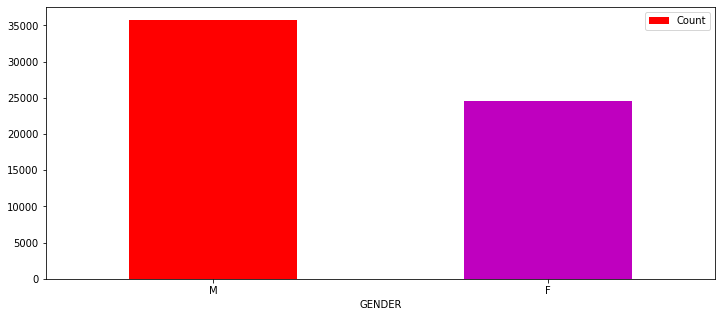

In [146]:
colors = ['r', 'm']  # We pass this color array to plot the bars with different colors
sales_df_plot.plot(kind='bar', x = 'GENDER', y = 'Count', rot=0, color=colors, figsize=(12,5))  # Set the rot as 0 if you don't want the x ticks be 90 degrees rotated.
plt.show()

### Aggregate the data

You can do the equivalent job in the previous subsection in Spark by aggregating the data by GENDER. <br>Here are a few of the ways that you can do that:

** Run an SQL query on the GENDER column to output the count of the GENDER, and then run a group by operation on the GENDER.
<br>** Create a simple Python function to aggregate by GENDER, and then run the function in an SQL query.
<br>** Run the map() method on the Spark Dataframe to append a new column that contains the aggregated count by GENDER.
<br>** Run the groupBy() and count() methods on the Spark Dataframe. This is the method you'll use.

In [0]:
gender_df = spark_df.groupby("GENDER").count()

In [148]:
# Let's check to confirm that we got the expected results
gender_df.show()

+------+-----+
|GENDER|count|
+------+-----+
|     F|24504|
|     M|35748|
+------+-----+



### Create a chart using Spark SQL
Now, run an SQL query to group by GENDER and order by GENDER. Then, create a pandas DataFrame for the results and create a chart of the count of each gender.

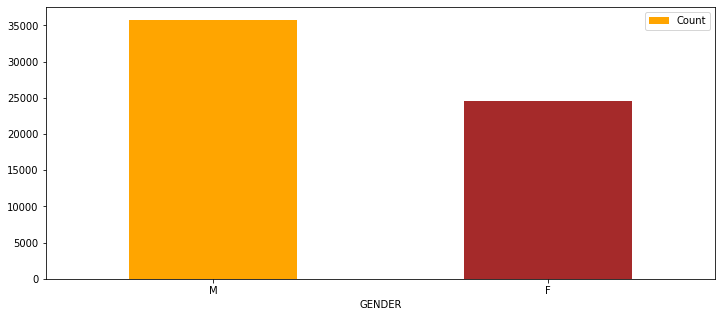

In [149]:
# First define the query string
query = """ select GENDER, count(GENDER) as Count from gosales_tx group by GENDER order by GENDER Desc"""
# Run the query, convert the output to pandas and save as chart_df
chart_df = spark.sql(query).toPandas()
# Next plot the data and pass its customised attributes
chart_df.plot(kind='bar', x = 'GENDER', y='Count', rot=0, color=['orange','brown'],figsize=(12,5))
# Finally shaow the data
plt.show()

Now we can create charts with spark data frames and pandas

## DataCamp Lesson 2 Contd...

### Aggregating

All of the common aggregation methods, like .min(), .max(), and .count() are GroupedData methods. These are created by calling the .groupBy() DataFrame method. You'll learn exactly what that means in a few exercises. For now, all you have to do to use these functions is call that method on your DataFrame. For example, to find the minimum value of a column, col, in a DataFrame, df, you could do:
```
df.groupBy().min("col").show()
```

In [150]:
new_spark_ratings_df.show(5)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    169|   2.5|1204927694|
|     1|   2471|   3.0|1204927438|
|     1|  48516|   5.0|1204927435|
|     2|   2571|   3.5|1436165433|
|     2| 109487|   4.0|1436165496|
+------+-------+------+----------+
only showing top 5 rows



In [151]:
# Let's print it's schema
new_spark_ratings_df.printSchema()

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp: string (nullable = true)



We can see that userId, movieId and rating columns are all strings. We need change UserId and movieId to integer and rating to float.

In [152]:
# Changing column names using the .cast() function.
for col_name in new_spark_ratings_df.columns[:-1]:
    if col_name == 'rating':
        new_spark_ratings_df = new_spark_ratings_df.withColumn(col_name, new_spark_ratings_df[col_name].cast('float'))
    else:
        new_spark_ratings_df = new_spark_ratings_df.withColumn(col_name, new_spark_ratings_df[col_name].cast('int'))
new_spark_ratings_df.show()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    169|   2.5|1204927694|
|     1|   2471|   3.0|1204927438|
|     1|  48516|   5.0|1204927435|
|     2|   2571|   3.5|1436165433|
|     2| 109487|   4.0|1436165496|
|     2| 112552|   5.0|1436165496|
|     2| 112556|   4.0|1436165499|
|     3|    356|   4.0| 920587155|
|     3|   2394|   4.0| 920586920|
|     3|   2431|   5.0| 920586945|
|     3|   2445|   4.0| 920586945|
|     4|     16|   4.0|1037740142|
|     4|     39|   4.0|1037740562|
|     4|     45|   4.0|1037808019|
|     4|     47|   2.0|1037739998|
|     4|     94|   5.0|1037740486|
|     4|    101|   4.0|1037737327|
|     4|    246|   4.0|1037739164|
|     4|    288|   2.0|1037737415|
|     4|    296|   4.0|1037741922|
+------+-------+------+----------+
only showing top 20 rows



Let's confirm that the column data types have been changed

In [153]:
new_spark_ratings_df.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: float (nullable = true)
 |-- timestamp: string (nullable = true)



Let's print out the min() rating.<br>
The code below creates a GroupedData object (so you can use the .min() method), then it finds the minimum value in the specified column, and returns it as a DataFrame.

In [154]:
new_spark_ratings_df.groupBy().min('rating').show()

+-----------+
|min(rating)|
+-----------+
|        0.5|
+-----------+



### Aggregating II

Use the .avg() method to get the average movie_rating where the userId == 4 and movieId > 100. show() the result.



In [155]:
new_spark_ratings_df.filter(new_spark_ratings_df.userId == 4).filter(new_spark_ratings_df.movieId > 100).groupby().avg('rating').show()

+------------------+
|       avg(rating)|
+------------------+
|3.7275280898876404|
+------------------+



Let's download the dtf-flights data set. But first let's remove any such data set if it exists

In [156]:
!rm dft-flights-data-2011.csv -f
!wget https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/236265/dft-flights-data-2011.csv

--2020-02-01 12:56:56--  https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/236265/dft-flights-data-2011.csv
Resolving www.gov.uk (www.gov.uk)... 151.101.0.144, 151.101.64.144, 151.101.128.144, ...
Connecting to www.gov.uk (www.gov.uk)|151.101.0.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/236265/dft-flights-data-2011.csv [following]
--2020-02-01 12:56:56--  https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/236265/dft-flights-data-2011.csv
Resolving assets.publishing.service.gov.uk (assets.publishing.service.gov.uk)... 151.101.0.144, 151.101.64.144, 151.101.128.144, ...
Connecting to assets.publishing.service.gov.uk (assets.publishing.service.gov.uk)|151.101.0.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286257 (280K) [text/csv]
Saving to: ‘d

In [157]:
# Let's read it to a spark data frame
dtf_flights_data = spark.read.csv('dft-flights-data-2011.csv', header=True)
dtf_flights_data.show(10)

+--------------------+--------------------+-------------------+------------+-----------------------+-----------+-------------------+--------------------+---------------+
|            Customer|Number of Travellers| Total Cost ex VAT |Travel Class|Ticket Single or Return|Travel Date|Journey Start Point|Journey Finish Point|    Air Carrier|
+--------------------+--------------------+-------------------+------------+-----------------------+-----------+-------------------+--------------------+---------------+
|Department for Tr...|                   1|             �81.52|     ECONOMY|                 Return|  10/2/2011|            GLASGOW|        LONDON - LGW|          FLYBE|
|Department for Tr...|                   1|            �217.14|     ECONOMY|                 Return|  29/3/2011|       LONDON - LGW|           MARRAKECH|        EASYJET|
|Department for Tr...|                   1|          �7,969.20|    BUSINESS|                 Return|   7/4/2011|       LONDON - LHR|           SINGAPO

In [158]:
# Lets's print the schema
dtf_flights_data.printSchema()

root
 |-- Customer: string (nullable = true)
 |-- Number of Travellers: string (nullable = true)
 |--  Total Cost ex VAT : string (nullable = true)
 |-- Travel Class: string (nullable = true)
 |-- Ticket Single or Return: string (nullable = true)
 |-- Travel Date: string (nullable = true)
 |-- Journey Start Point: string (nullable = true)
 |-- Journey Finish Point: string (nullable = true)
 |-- Air Carrier: string (nullable = true)



In [159]:
dtf_flights_data.columns

['Customer',
 'Number of Travellers',
 ' Total Cost ex VAT ',
 'Travel Class',
 'Ticket Single or Return',
 'Travel Date',
 'Journey Start Point',
 'Journey Finish Point',
 'Air Carrier']

Some column headers have unncessary spaces. let's clean it up

Let's change to pandas dataframe

In [160]:
# Let's change it to a pandas column and clean out the column names
dtf_flights_data = dtf_flights_data.toPandas()
dtf_flights_data.head()

,Customer,Number of Travellers,Total Cost ex VAT,Travel Class,Ticket Single or Return,Travel Date,Journey Start Point,Journey Finish Point,Air Carrier
0,Department for Transport,1,�81.52,ECONOMY,Return,10/2/2011,GLASGOW,LONDON - LGW,FLYBE
1,Department for Transport,1,�217.14,ECONOMY,Return,29/3/2011,LONDON - LGW,MARRAKECH,EASYJET
2,Department for Transport,1,"�7,969.20",BUSINESS,Return,7/4/2011,LONDON - LHR,SINGAPORE,BRITISH AIRWAYS
3,Department for Transport,1,�272.82,BUSINESS,Return,7/4/2011,LONDON - LGW,EDINBURGH,BRITISH AIRWAYS
4,Department for Transport,1,"�7,969.20",BUSINESS,Return,7/4/2011,LONDON - LHR,SINGAPORE,BRITISH AIRWAYS


In [0]:
headers = ['Customer','Number_of_Travellers','Total_Cost_ex_VAT','Travel_Class','Ticket_Single_or_Return', 'Travel_Date',
           'Journey_Start_Point','Journey_Finish_Point','Air_Carrier']

In [162]:
# Let's make the column headers, headers
dtf_flights_data.columns = headers
dtf_flights_data.head(3)

,Customer,Number_of_Travellers,Total_Cost_ex_VAT,Travel_Class,Ticket_Single_or_Return,Travel_Date,Journey_Start_Point,Journey_Finish_Point,Air_Carrier
0,Department for Transport,1,�81.52,ECONOMY,Return,10/2/2011,GLASGOW,LONDON - LGW,FLYBE
1,Department for Transport,1,�217.14,ECONOMY,Return,29/3/2011,LONDON - LGW,MARRAKECH,EASYJET
2,Department for Transport,1,"�7,969.20",BUSINESS,Return,7/4/2011,LONDON - LHR,SINGAPORE,BRITISH AIRWAYS


Next let's clean the Total_Cost_ex-VAT column, removing the question mark in front and any commas,then converting to a float, then we convert the number of travellers column to an int8

In [0]:
dtf_flights_data['Total_Cost_ex_VAT'] = dtf_flights_data['Total_Cost_ex_VAT'].apply(lambda x: x[1:]).apply(lambda x: x.replace(',',''))

In [0]:
dtf_flights_data = dtf_flights_data.astype({'Total_Cost_ex_VAT':'float', 'Number_of_Travellers':'int8'})

In [165]:
dtf_flights_data.dtypes

Customer                    object
Number_of_Travellers          int8
Total_Cost_ex_VAT          float64
Travel_Class                object
Ticket_Single_or_Return     object
Travel_Date                 object
Journey_Start_Point         object
Journey_Finish_Point        object
Air_Carrier                 object
dtype: object

Let's convert the cleaned table to a Spark data frame

In [166]:
spark_dtf_flights_df = spark.createDataFrame(dtf_flights_data)
spark_dtf_flights_df.show(5)

+--------------------+--------------------+-----------------+------------+-----------------------+-----------+-------------------+--------------------+---------------+
|            Customer|Number_of_Travellers|Total_Cost_ex_VAT|Travel_Class|Ticket_Single_or_Return|Travel_Date|Journey_Start_Point|Journey_Finish_Point|    Air_Carrier|
+--------------------+--------------------+-----------------+------------+-----------------------+-----------+-------------------+--------------------+---------------+
|Department for Tr...|                   1|            81.52|     ECONOMY|                 Return|  10/2/2011|            GLASGOW|        LONDON - LGW|          FLYBE|
|Department for Tr...|                   1|           217.14|     ECONOMY|                 Return|  29/3/2011|       LONDON - LGW|           MARRAKECH|        EASYJET|
|Department for Tr...|                   1|           7969.2|    BUSINESS|                 Return|   7/4/2011|       LONDON - LHR|           SINGAPORE|BRITISH A

In [167]:
spark_dtf_flights_df.printSchema()

root
 |-- Customer: string (nullable = true)
 |-- Number_of_Travellers: long (nullable = true)
 |-- Total_Cost_ex_VAT: double (nullable = true)
 |-- Travel_Class: string (nullable = true)
 |-- Ticket_Single_or_Return: string (nullable = true)
 |-- Travel_Date: string (nullable = true)
 |-- Journey_Start_Point: string (nullable = true)
 |-- Journey_Finish_Point: string (nullable = true)
 |-- Air_Carrier: string (nullable = true)



Use the .sum() method to get the total cost excluding VAT, where the Air_Carrier is British Airways

In [168]:
spark_dtf_flights_df.filter(spark_dtf_flights_df.Air_Carrier == 'BRITISH AIRWAYS').groupby().sum('Total_Cost_ex_VAT').show()

+----------------------+
|sum(Total_Cost_ex_VAT)|
+----------------------+
|    484898.04999999906|
+----------------------+



Use the .sum() method to get the total cost excluding VAT, where the travel class is business class

In [169]:
spark_dtf_flights_df.filter(spark_dtf_flights_df.Travel_Class == 'BUSINESS').groupby().sum('Total_Cost_ex_VAT').show()

+----------------------+
|sum(Total_Cost_ex_VAT)|
+----------------------+
|     696179.6199999996|
+----------------------+



Let's add the spark_flights df as a temporary table in our session catalog

In [0]:
spark_dtf_flights_df.createOrReplaceTempView('spark_dtf_flights_table')

In [171]:
spark.catalog.listTables()

[Table(name='data_e2_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='example3', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='gosales_tx', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_dtf_flights_table', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_links_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_ratings_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='spark_tags_df', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='temp_movies', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='world_bank', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

### Grouping and Aggregating I

PySpark has a whole class devoted to grouped data frames: pyspark.sql.GroupedData, which you saw in the last two exercises.

You've learned how to create a grouped DataFrame by calling the .groupBy() method on a DataFrame with no arguments.

Now you'll see that when you pass the name of one or more columns in your DataFrame to the .groupBy() method, the aggregation methods behave like when you use a GROUP BY statement in a SQL query!

In [172]:
# Groupby Travel_Class
by_class = spark_dtf_flights_df.groupBy('Travel_Class')
by_class.count().show()

+---------------+-----+
|   Travel_Class|count|
+---------------+-----+
|       BUSINESS|  420|
|        ECONOMY| 2465|
|PREMIUM ECONOMY|   61|
|          FIRST|    9|
+---------------+-----+



In [173]:
# Groupby Air_Carrier
by_carrier = spark_dtf_flights_df.groupBy('Air_Carrier')
by_carrier.count().show()

+--------------------+-----+
|         Air_Carrier|count|
+--------------------+-----+
|          AIR CANADA|   27|
|     EASTERN AIRWAYS|  183|
|            ALITALIA|    7|
|             EASYJET|  242|
|          AIR FRANCE|   58|
|    CROATIA AIRLINES|    1|
|     BRITISH MIDLAND|  106|
|             WIZZAIR|    9|
|     ICELAND AIRWAYS|    1|
|          AIR BERLIN|    2|
|      MISC SUPPLIERS|    5|
|KINGFISHER AIRLIN...|    3|
|               JET 2|    2|
|CONTINENTAL AIRLINES|    4|
|     VIRGIN ATLANTIC|   39|
|                MANX|    4|
|     CIMBER STERLING|    2|
|SOUTH AFRICAN AIR...|    3|
|   AER ARANN EXPRESS|    1|
|           LUFTHANSA|   31|
+--------------------+-----+
only showing top 20 rows



In [174]:
# Groupby tickets
by_ticket = spark_dtf_flights_df.groupBy('Ticket_Single_or_Return')
by_ticket.count().show()

+-----------------------+-----+
|Ticket_Single_or_Return|count|
+-----------------------+-----+
|                 Return| 2145|
|                 Single|  810|
+-----------------------+-----+



In [175]:
# Find average total cost excluding VAT for ticket types
by_ticket.avg('Total_Cost_ex_VAT').show()

+-----------------------+----------------------+
|Ticket_Single_or_Return|avg(Total_Cost_ex_VAT)|
+-----------------------+----------------------+
|                 Return|     583.4886480186494|
|                 Single|    183.18604938271622|
+-----------------------+----------------------+



### Grouping and Aggregating II

In addition to the GroupedData methods you've already seen, there is also the .agg() method. This method lets you pass an aggregate column expression that uses any of the aggregate functions from the pyspark.sql.functions submodule.

This submodule contains many useful functions for computing things like standard deviations. All the aggregation functions in this submodule take the name of a column in a GroupedData table.

In [0]:
import pyspark.sql.functions as F

In [0]:
# Groupby Travel_Class and Air_Carrier
by_travel_carrier = spark_dtf_flights_df.groupBy('Travel_Class','Air_Carrier')

In [178]:
# Get the average total cost excluding VAt by Travel_Class and Air_Carrier
by_travel_carrier.avg('Total_Cost_ex_VAT').show()

+---------------+--------------------+----------------------+
|   Travel_Class|         Air_Carrier|avg(Total_Cost_ex_VAT)|
+---------------+--------------------+----------------------+
|        ECONOMY|               JET 2|               174.845|
|PREMIUM ECONOMY|            ALITALIA|                  64.6|
|       BUSINESS|            EMIRATES|    1991.1333333333332|
|       BUSINESS|     BRITISH MIDLAND|     780.1386666666668|
|        ECONOMY|SN BRUSSELS AIRLINES|                 406.5|
|       BUSINESS|             FINNAIR|    1276.7642857142857|
|        ECONOMY|             WIZZAIR|     90.05777777777777|
|        ECONOMY| LOT POLISH AIRLINES|                288.65|
|        ECONOMY|           AIR MALTA|                 455.7|
|       BUSINESS| TAM - LINHAS AEREAS|                1050.2|
|        ECONOMY|      CYPRUS AIRWAYS|                 152.7|
|PREMIUM ECONOMY|     BRITISH AIRWAYS|               2271.97|
|        ECONOMY|CHINA EASTERN AIR...|    386.41999999999996|
|       

In [179]:
by_travel_carrier.agg(F.stddev('Total_Cost_ex_VAT')).show()

+---------------+--------------------+------------------------------+
|   Travel_Class|         Air_Carrier|stddev_samp(Total_Cost_ex_VAT)|
+---------------+--------------------+------------------------------+
|        ECONOMY|               JET 2|            129.88844463615692|
|PREMIUM ECONOMY|            ALITALIA|                           NaN|
|       BUSINESS|            EMIRATES|             500.9058461094927|
|       BUSINESS|     BRITISH MIDLAND|             505.7784452542532|
|        ECONOMY|SN BRUSSELS AIRLINES|            330.88973238829885|
|       BUSINESS|             FINNAIR|             965.4667837865983|
|        ECONOMY|             WIZZAIR|             27.20542398942616|
|        ECONOMY| LOT POLISH AIRLINES|             81.24656915833434|
|        ECONOMY|           AIR MALTA|             44.12346314604055|
|       BUSINESS| TAM - LINHAS AEREAS|                           0.0|
|        ECONOMY|      CYPRUS AIRWAYS|                           NaN|
|PREMIUM ECONOMY|   

### Joining

A join will combine two different tables along a column that they share. This column is called the key. Examples of keys here include the Journey start point or the movieId column in the movies dataset.

### Joining II

In PySpark, joins are performed using the DataFrame method .join(). This method takes three arguments. The first is the second DataFrame that you want to join with the first one. The second argument, on, is the name of the key column(s) as a string. The names of the key column(s) must be the same in each table. The third argument, how, specifies the kind of join to perform. In this course we'll always use the value how="leftouter".

Let's define the spark_movies_df from the pandas movies_df

In [180]:
spark_movies_df = spark.createDataFrame(movies_df)
spark_movies_df.show(5)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows



In [181]:
spark_movies_df.count()

34208

Let's see the new_spark_ratings_df

In [182]:
new_spark_ratings_df.show(5)

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    169|   2.5|1204927694|
|     1|   2471|   3.0|1204927438|
|     1|  48516|   5.0|1204927435|
|     2|   2571|   3.5|1436165433|
|     2| 109487|   4.0|1436165496|
+------+-------+------+----------+
only showing top 5 rows



In [183]:
new_spark_ratings_df.count()

22884377

### Renaming a Column name in pyspark

In [184]:
# I can rename the timestamp col of new_spark_ratings_df by using the .withColumnRenamed() func.
new_spark_ratings_df = new_spark_ratings_df.withColumnRenamed('timestamp', 'time')
# first pass the column name, then the renamed name in second place.
new_spark_ratings_df.show(5)

+------+-------+------+----------+
|userId|movieId|rating|      time|
+------+-------+------+----------+
|     1|    169|   2.5|1204927694|
|     1|   2471|   3.0|1204927438|
|     1|  48516|   5.0|1204927435|
|     2|   2571|   3.5|1436165433|
|     2| 109487|   4.0|1436165496|
+------+-------+------+----------+
only showing top 5 rows



Join both new_spark_ratings_df and spark_movies_df on column movieId.<br>
call the .join() method on the new_spark_ratings_df

In [185]:
spark_movies_ratings_df = new_spark_ratings_df.join(spark_movies_df, on='movieId', how='left_outer')
spark_movies_ratings_df.show(5)

+-------+------+------+----------+--------------+------+
|movieId|userId|rating|      time|         title|genres|
+-------+------+------+----------+--------------+------+
|     26|    38|   3.5|1228039312|Othello (1995)| Drama|
|     26|   114|   3.0|1003527162|Othello (1995)| Drama|
|     26|   407|   3.5|1118267047|Othello (1995)| Drama|
|     26|   447|   2.5|1326528578|Othello (1995)| Drama|
|     26|   503|   3.0|1216156573|Othello (1995)| Drama|
+-------+------+------+----------+--------------+------+
only showing top 5 rows



In [186]:
spark_movies_ratings_df.count()

22884377

Notice that automatically, the movieId column becomes the first column.<br>
This is because it is the key of the join command. Both tables are joined on it.

## Summary and next steps
You've learned how to create DataFrames, convert between DataFrame types, and convert from RDDs. You know how to run SQL queries and create SQL functions. And you can visualize the data in charts.

Go to the next notebook in this series: [Introduction to Spark lab, part 3: Machine learning.](https://dataplatform.cloud.ibm.com/exchange/public/entry/view/5ad1c820f57809ddec9a040e37b4af08)

Dig deeper:

[Apache Spark documentation](http://spark.apache.org/documentation.html)<br>
[PySpark documentation](http://spark.apache.org/docs/latest/api/python/pyspark.html)<br>
[pandas](http://pandas.pydata.org/pandas-docs/stable/index.html)<br>
[matplotlib](http://matplotlib.org/)<br>
[NumPy](http://www.numpy.org/)